In [6]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras import regularizers
from matplotlib import pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns 
import pandas as pd
import shutil
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
import keras
from matplotlib import pyplot as plt

In [7]:
img_height, img_width = 128, 128
batch_size = 64
train_data_dir = "Dataset2/"
test_data_dir = "Test/"

# Create test directory and move 10% of the data to this directory
if not os.path.exists(test_data_dir):
    os.makedirs(test_data_dir)
    for class_name in os.listdir(train_data_dir):
        class_dir = os.path.join(train_data_dir, class_name)
        test_class_dir = os.path.join(test_data_dir, class_name)
        os.makedirs(test_class_dir)
        files = os.listdir(class_dir)
        n_test = int(len(files) * 0.1)
        test_files = files[:n_test]
        for test_file in test_files:
            src = os.path.join(class_dir, test_file)
            dst = os.path.join(test_class_dir, test_file)
            shutil.move(src, dst)

# Create data generators

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split=0.3
                                   )
train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                target_size=(img_height,img_width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                subset='training')
valid_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')
test_datagen = ImageDataGenerator(rescale=1./255,shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,)
test_generator = test_datagen.flow_from_directory(test_data_dir,
                                                target_size=(img_height,img_width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                
                                                ) 

Found 13333 images belonging to 4 classes.
Found 5711 images belonging to 4 classes.
Found 2114 images belonging to 4 classes.


In [8]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [128, 128,3]),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(32, activation = 'relu'),
    keras.layers.Dense(4, activation = 'softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 49152)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               6291584   
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 132       
Total params: 6,302,052
Trainable params: 6,302,052
Non-trainable params: 0
_________________________________________________________________


In [9]:
patience = 1
stop_patience = 5
factor = 0.5

callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=stop_patience, monitor='val_loss', verbose=1, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=factor, patience=patience, verbose=1) ]

In [10]:
model.compile(optimizer='Adam',loss="categorical_crossentropy",metrics=['accuracy'])
history=model.fit(train_generator,
                   epochs=30,
                    verbose=1,
                    validation_data=valid_generator)

model.save("demo1/ann1.h5")

Epoch 1/30
209/209 [==============================] - 108s 516ms/step - loss: 1.4061 - accuracy: 0.5567 - val_loss: 0.8666 - val_accuracy: 0.6493
Epoch 2/30
209/209 [==============================] - 103s 493ms/step - loss: 0.9678 - accuracy: 0.5978 - val_loss: 0.9397 - val_accuracy: 0.6312
Epoch 3/30
209/209 [==============================] - 159s 762ms/step - loss: 0.8878 - accuracy: 0.6233 - val_loss: 0.7929 - val_accuracy: 0.6685
Epoch 4/30
209/209 [==============================] - 200s 960ms/step - loss: 0.8374 - accuracy: 0.6492 - val_loss: 0.8048 - val_accuracy: 0.6472
Epoch 5/30
209/209 [==============================] - 220s 1s/step - loss: 0.8643 - accuracy: 0.6358 - val_loss: 0.7736 - val_accuracy: 0.6855
Epoch 6/30
209/209 [==============================] - 235s 1s/step - loss: 0.8073 - accuracy: 0.6647 - val_loss: 0.8370 - val_accuracy: 0.6155
Epoch 7/30
209/209 [==============================] - 199s 952ms/step - loss: 0.8109 - accuracy: 0.6632 - val_loss: 0.8162 - val_a

In [17]:
modelAccuracy = model.evaluate(test_generator, verbose=0)
print('Test Accuracy is {}%'.format(modelAccuracy[1] * 100))

Test Accuracy is 69.25260424613953%


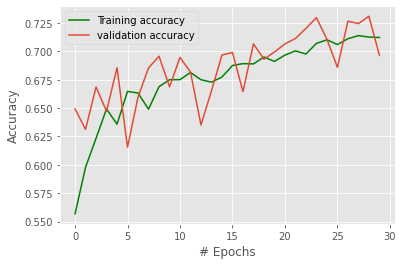

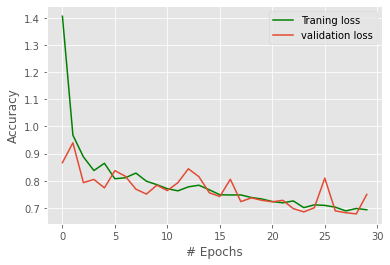

In [12]:
plt.style.use("ggplot")
plt.figure()
plt.plot(history.history['accuracy'],'r',label='Training accuracy',color='green')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("demo1/ann1_acc.png")
plt.show()


plt.style.use("ggplot")
plt.figure()
plt.plot(history.history['loss'],'r',label='Traning loss',color='green')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("demo1/ann1_loss.png")
plt.show()

In [23]:
class_names = ['COVID-19','Normal','Viral Pneumonia', 'Lung_Opacity']
y_pred = model.predict(test_generator)
print(class_names[np.argmax(y_pred[2])])

Viral Pneumonia


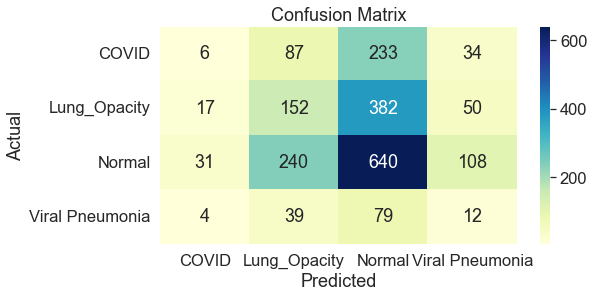

In [14]:
y_pred = model.predict(test_generator) # predict on test_generator

y_pred_classes = np.argmax(y_pred, axis=1) # obtain predicted class labels

conf_mat = confusion_matrix(test_generator.classes, y_pred_classes)

class_names = list(test_generator.class_indices.keys())

conf_mat_df = pd.DataFrame(conf_mat, index=class_names, columns=class_names)

plt.figure(figsize=(8,4))
sns.set(font_scale=1.5, color_codes=True, palette='deep')
sns.heatmap(conf_mat_df, annot=True, fmt='d', cmap="YlGnBu")
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [15]:
y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)

# Get the true labels
y_true = test_generator.classes

# Calculate precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'F1-score: {f1_score:.3f}')

Precision: 0.355
Recall: 0.382
F1-score: 0.350


In [24]:
from sklearn.metrics import classification_report

# obtain predicted class probabilities
y_pred = model.predict(test_generator)

# obtain predicted class labels
if y_pred.ndim == 2:
    # if y_pred is 2D, take the argmax along axis 1
    y_pred_classes = np.argmax(y_pred, axis=1)
else:
    # if y_pred is 1D, convert it to a binary array of predicted labels
    y_pred_classes = np.array([1 if p >= 0.5 else 0 for p in y_pred])

# obtain true class labels
y_true = test_generator.classes

# obtain class names
class_names = list(test_generator.class_indices.keys())

# generate classification report
report = classification_report(y_true, y_pred_classes, target_names=class_names)

print(report)


                 precision    recall  f1-score   support

          COVID       0.18      0.03      0.05       360
   Lung_Opacity       0.27      0.23      0.25       601
         Normal       0.49      0.63      0.55      1019
Viral Pneumonia       0.05      0.08      0.07       134

       accuracy                           0.38      2114
      macro avg       0.25      0.25      0.23      2114
   weighted avg       0.34      0.38      0.35      2114

